<a href="https://colab.research.google.com/github/Mikolaj613/Kurs-Ai/blob/main/7_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
df = sns.load_dataset("titanic")
print(f"pierwsze 10 wpisow z titanic")
print(df.head(10))

pierwsze 10 wpisow z titanic
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       

In [14]:
print(f"liczba braku wartosci przed czysczeniem")
print(df.isnull().sum())

liczba braku wartosci przed czysczeniem
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [15]:
df=df.dropna(subset=['age'])
print(f"liczba braku wartosci po czysczeniu dla wieku")
print(df.isnull().sum())

liczba braku wartosci po czysczeniu dla wieku
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64


In [28]:
print(f"min bilet : {df['fare'].min()}")
print(f"max bilet : {df['fare'].max()}")

def categorize_fare(fare,fare_range):
  if fare<=fare_range[0]:
    return 0
  elif fare<=fare_range[1]:
    return 1
  else:
    return 2
  pass

min_fare = df['fare'].min()
max_fare = df['fare'].max()
fare_step = (max_fare-min_fare)/3
fare_ranges = [min_fare+fare_step, min_fare+2*fare_step]

print(f"przdzialy cen biletów:")
print(f"niska {min_fare:.2f}-{fare_ranges[0]:.2f}")
print(f"srednia {fare_ranges[0]:.2f}-{fare_ranges[1]:.2f}")
print(f"wysoka {fare_ranges[1]:.2} - {max_fare:.2f}")

min bilet : 0.0
max bilet : 512.3292
przdzialy cen biletów:
niska 0.00-170.78
srednia 170.78-341.55
wysoka 3.4e+02 - 512.33


In [31]:
selected_features = ["sex","age","pclass","fare_category"]
df_model = df.copy()
df_model["sex"] = df_model["sex"].map({"male":0,"female":1})
df_model["fare_category"] = df_model["fare"].apply(lambda x: categorize_fare(x, fare_ranges))
print(df_model.groupby(["fare_category"]).count())


               survived  pclass  sex  age  sibsp  parch  fare  embarked  \
fare_category                                                             
0                   696     696  696  696    696    696   696       694   
1                    15      15   15   15     15     15    15        15   
2                     3       3    3    3      3      3     3         3   

               class  who  adult_male  deck  embark_town  alive  alone  
fare_category                                                           
0                696  696         696   168          694    696    696  
1                 15   15          15    14           15     15     15  
2                  3    3           3     2            3      3      3  


In [33]:
x = df_model[selected_features]
y = df_model["survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

[0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1]
Dokładność modelu: 0.741
[[68 19]
 [18 38]]


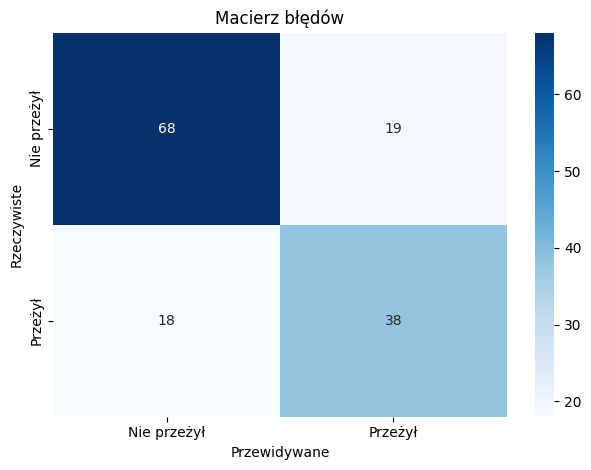

In [35]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)

print(f"Dokładność modelu: {accuracy:.3f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix,
            annot=True,
            cmap="Blues",
            xticklabels = ["Nie przeżył", "Przeżył"],
            yticklabels = ["Nie przeżył", "Przeżył"])
plt.title("Macierz błędów")
plt.xlabel("Przewidywane")
plt.ylabel("Rzeczywiste")
plt.tight_layout()
plt.show()

In [36]:
tn,tp,fn,fp = conf_matrix.ravel()
sensivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (sensivity * precision) / (sensivity + precision)

print(f"czulość: {sensivity:.3f}")
print(f"precyzja: {precision:.3f}")
print(f"F1-score: {f1:3f}")

czulość: 0.514
precyzja: 0.333
F1-score: 0.404255


In [ ]:
while True:
  print(f"prognoza przezycia dla nowego pasażera")
  print("(wpisz 'koniec', aby zakończyć)")

  sex_input= input("podaj płeć (m/k): ").lower()
  if sex_input == "koniec":
    break
  sex = 1 if sex_input == "k" else 0

  age_input=input("podaj wiek: ")
  if age_input == "koniec":
    break
  age = int(age_input)

  pclass_input=input("podaj klasę (1/2/3): ")
  if pclass_input == "koniec":
    break
  pclass = int(pclass_input)

  fare_input = input("podaj cenę biletu: ")
  if fare_input == "koniec":
    break
  fare = float(fare_input)

  fare_category = categorize_fare(fare, fare_ranges)

  new_passenger = pd.DataFrame({"sex":[sex], "age":[age], "pclass":[pclass], "fare_category":[fare_category]})

  new_passenger_scaled = scaler.transform(new_passenger)
  pred = model.predict(new_passenger_scaled)
  proba = model.predict_proba(new_passenger_scaled)

  print(f"przeżył:" + "Tak" if pred[0] == 1 else "Nie")
  print(f"prawdopodobienstwo przeżycia: {proba[0][1]:.2f}")
  pass
print("koniec programu")

prognoza przezycia dla nowego pasażera
(wpisz 'koniec', aby zakończyć)
